In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
import time



E:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the data

In [2]:
year='../Data/datasetsFinalaizedForEDA/datasets_top100-2018.csv'
df_new=pd.read_csv('../Data/intermediate datasets-ToBeUsedForRanking/df_2018_new.csv')
new_dataframe_name="../Data/intermediate datasets-ToBeUsedForRanking/df_2018_new.csv"



In [3]:
def load(year):
    df=pd.read_csv(year)
    return df

#df_2019=pd.read_csv('../data/datasets_top50-2019.csv',encoding='latin-1')


In [4]:
load(year)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.3570,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.4730,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.1400,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.4390,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.3500,91.030,217925.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0


In [5]:
df=load(year)

# data properties

In [6]:
def data_properties(year):
    print("properties for year are as follows :\n")
    print("column details:\n")
    print(year.columns)
    print("shape:\n")
    print(year.shape)
    print("info about dataset:\n")
    print(year.info())
    print("\n")


In [7]:
data_properties(df)

properties for year are as follows :

column details:

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
shape:

(100, 16)
info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64


### Initial calculations on data

#### checking if any value is null in the data 

In [8]:
def checkfornull(year):
    print("cheking for null values......")
    print(year.columns[year.isnull().any()])
    output=year.isnull().sum()
    return output 

In [9]:
checkfornull(df)

cheking for null values......
Index([], dtype='object')


id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

#### convert the non float data to float data type

In [10]:
# in the data we obsrve that all the data is not in float .So , in order to maintain a symetry,we will 
# convert the non float data to float data type

def float_conversion(column,value):
    column= pd.to_numeric(value, downcast="float")
    return column


In [11]:
def execute_float_conversion():
    float_conversion(df.mode,df["mode"])
    float_conversion(df.duration_ms,df["duration_ms"])
    float_conversion(df.time_signature,df["time_signature"])
    return df.head()


In [12]:
execute_float_conversion()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


## Sequential column analysis

In [13]:
#Sequential column analysis: for in depth understanding 

In [14]:
def understand_feature(feature):
    return feature.describe()


#### danceability

In [15]:
#The higher the value, the easier it is to dance to this song.
def print_overall_dancebility_features():
    print("overall danceability feature\n")
    return understand_feature(df["danceability"])


In [16]:
print_overall_dancebility_features()

overall danceability feature



count    100.00000
mean       0.71646
std        0.13107
min        0.25800
25%        0.63550
50%        0.73300
75%        0.79825
max        0.96400
Name: danceability, dtype: float64

In [17]:
def top_10_dancebility():
    print("top 10  danceability feature\n")
    return understand_feature(df["danceability"].head(10))



In [18]:
top_10_dancebility()

top 10  danceability feature



count    10.000000
mean      0.740400
std       0.086164
min       0.587000
25%       0.694750
50%       0.747000
75%       0.809750
max       0.836000
Name: danceability, dtype: float64

In [19]:
#sorting out more danceble songs 
def sorting_dancebility():
    df['dancebility_new']=df['danceability']
    df.loc[df['danceability']>=0.6000,'dancebility_new']='1'
    df.loc[(df['danceability']<0.6000),'dancebility_new']='0'

    return (df['dancebility_new'].value_counts())

In [20]:
sorting_dancebility()

1    82
0    18
Name: dancebility_new, dtype: int64

In [21]:
print("top 10  energy  feature\n")
understand_feature(df["energy"].head(10))

top 10  energy  feature



count    10.000000
mean      0.635700
std       0.143074
min       0.449000
25%       0.547750
50%       0.588000
75%       0.701000
max       0.880000
Name: energy, dtype: float64

#### In Depth BPM

Understanding beats per minute i.e tempo of the song
here we do classification of the tempo on the bases of beats per min 
REf:https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/

And creating a new feature :tempo_rate 
tempo_rate:This classifies the song on the basis of bpm like:
    - very slow
    - slow
    - moderate
    - fast
    - very fast


In [22]:
def tempo_rate():
    df['tempo_rate']=df['tempo']
    return df['tempo_rate']

In [23]:
tempo_rate()

0      77.169
1      75.023
2     159.847
3     140.124
4      91.030
       ...   
95    125.046
96    105.076
97    135.702
98    180.043
99    126.684
Name: tempo_rate, Length: 100, dtype: float64

In [24]:
def cateogarise_tempo_rate():
    df.loc[df['tempo']<65,'tempo_rate']='very slow'
    df.loc[(df['tempo']>=66) & (df['tempo']<=76),'tempo_rate']='slow'
    df.loc[(df['tempo']>=77) & (df['tempo']<=108),'tempo_rate']='moderate'
    df.loc[(df['tempo']>=109) & (df['tempo']<=168),'tempo_rate']='fast'
    df.loc[df['tempo']>168,'tempo_rate']='very fast'


In [25]:
cateogarise_tempo_rate()

In [26]:
def describe_songs_per_tempo_rate():
    print("Tempo Rate\tCount\n")
    print(df['tempo_rate'].value_counts())
    print("\n")
    df.head()

In [27]:
describe_songs_per_tempo_rate()

Tempo Rate	Count

fast         47
moderate     44
very fast     7
very slow     1
slow          1
Name: tempo_rate, dtype: int64




In [28]:
def barplot_temporate():
    sns.barplot(x=pd.DataFrame(df['tempo_rate'].value_counts()).tempo_rate, 
                y=pd.DataFrame(df['tempo_rate'].value_counts()).index
               )
    plt.title('music tempo', fontsize=17);

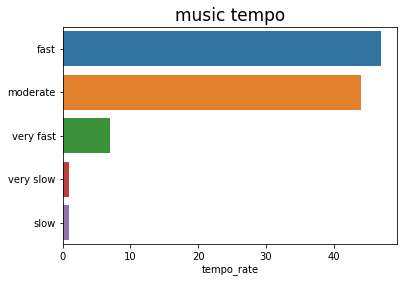

In [29]:
barplot_temporate()

sort the songs on the bases of important parametes like :

In [30]:
def sort_imp_parameters():
    return df[['name','artists','danceability','valence','tempo','tempo_rate','energy']].sort_values(by=["danceability","energy","valence"],ascending=False).head(10)

As we can see that these features collectively couldn't generate the sorted manner of artist as expected.We need to change our approach and include more features 


#### Analysing top artists
Analysing Top artists will give us a better idea about the feature importance 

In [31]:
#count the value:in terms on songs per year for an  artist
def songs_per_artist():
    print("Artist\t\tSongs\n")
    print(df["artists"].value_counts().head(20))

In [32]:
songs_per_artist()

Artist		Songs

Post Malone        6
XXXTENTACION       6
Drake              4
Marshmello         3
Ed Sheeran         3
Khalid             2
Calvin Harris      2
Ariana Grande      2
Migos              2
Kendrick Lamar     2
Ozuna              2
Maroon 5           2
The Weeknd         2
Selena Gomez       2
Imagine Dragons    2
Camila Cabello     2
Clean Bandit       2
Dua Lipa           2
Rudimental         1
6ix9ine            1
Name: artists, dtype: int64


#### Comparing  the  top artists based on our features 
lets start with top 5:

- Post Malone         6
- XXXTENTACION        6
- Drake               4
- Ed Sheeran          3
- Marshmello          3

In [33]:
def first():
    PostMalone=df[df['artists']=='Post Malone']
    print("Post Malone:")
    return PostMalone[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [34]:
first()

Post Malone:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
2,rockstar (feat. 21 Savage),0.587,0.535,-6.090,0.140,159.847,fast
3,Psycho (feat. Ty Dolla $ign),0.739,0.559,-8.011,0.439,140.124,fast
5,Better Now,0.680,0.563,-5.843,0.374,145.028,fast
32,I Fall Apart,0.556,0.538,-5.408,0.291,143.950,fast
75,Candy Paint,0.670,0.654,-5.944,0.438,180.024,very fast
76,Congratulations,0.630,0.804,-4.183,0.492,123.146,fast


In [35]:
def second():
    XXXTENTACION=df[df['artists']=='XXXTENTACION']
    print("XXXTENTACION:")
    return XXXTENTACION[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [36]:
second()

XXXTENTACION:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
1,SAD!,0.740,0.613,-4.880,0.473,75.023,slow
18,Moonlight,0.921,0.537,-5.723,0.711,128.009,fast
28,Jocelyn Flores,0.872,0.391,-9.144,0.437,134.021,fast
38,changes,0.669,0.308,-10.068,0.520,64.934,very slow
62,Fuck Love (feat. Trippie Redd),0.797,0.533,-9.740,0.329,131.036,fast
94,Everybody Dies In Their Nightmares,0.734,0.570,-7.066,0.689,129.953,fast


In [37]:
def third():
    Drake=df[df['artists']=='Drake']
    print("Drake:")
    return Drake[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [38]:
third()

Drake:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
0,God's Plan,0.754,0.449,-9.211,0.357,77.169,moderate
4,In My Feelings,0.835,0.626,-5.833,0.350,91.030,moderate
12,Nice For What,0.586,0.909,-6.474,0.757,93.394,moderate
61,Nonstop,0.912,0.412,-8.074,0.422,154.983,fast


In [39]:
def forth():
    EdSheeran  =df[df['artists']=='Ed Sheeran']
    print("Ed Sheeran :")
    return EdSheeran  [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [40]:
forth()

Ed Sheeran :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
25,Shape of You,0.825,0.652,-3.183,0.931,95.977,moderate
29,Perfect,0.599,0.448,-6.312,0.168,95.050,moderate
84,Perfect Duet (Ed Sheeran & Beyonc?),0.587,0.299,-7.365,0.356,94.992,moderate


In [41]:
def fifth():
    Marshmello   =df[df['artists']=='Marshmello']
    print("Marshmello   :")
    return Marshmello   [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [42]:
fifth()

Marshmello   :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
9,FRIENDS,0.626,0.880,-2.384,0.534,95.079,moderate
51,Happier,0.687,0.792,-2.749,0.671,100.015,moderate
64,Silence,0.520,0.761,-3.093,0.286,141.971,fast


Here's the observation for the above  top 5 results:
- dancebility:Range:0.49-->0.90+
- energy:Range:0.48-->0.90+ , in general, the enegy in not very significant but  top songs have energy more than 0.48
- loudness:more -ve loudness means more popular the song is 
- valence:Range:Not a very important criteria
- tempo:Range:can not conclude about this, need more EDA
- tempo rate:Range: fast and moderate are in top



# EDA

### PCA plot-large features

In [43]:
def plot_PCA_large():
    feture_to_plot = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
    text1 = df["artists"] + " - " + df["name"]
    text2 = text1.values
    X = df[feture_to_plot].values
    y = df["danceability"].values
    min_maxscaler = MinMaxScaler()
    X = min_maxscaler.fit_transform(X)
    pca = PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    plot3d = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
        text=text2,
        mode="markers",
        marker=dict(
            size=8,
            color=y
        )
    )

    fig = go.Figure(data=[plot3d])
    py.iplot(fig, filename="3d graph")


In [44]:
plot_PCA_large()

### Plot correlation matrix

In [45]:
def plot_correlation():
    correlation = df[['acousticness','danceability','energy','instrumentalness','liveness','tempo','valence',
                           'loudness']]
    plt.figure(figsize=(12,8))
    sns.heatmap(correlation.corr(), annot=True,cmap="coolwarm");

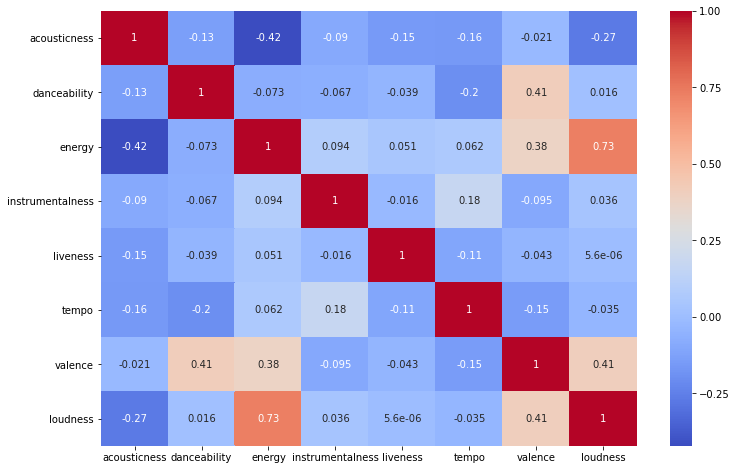

In [46]:
plot_correlation()

We can observe that there is a correlation between the loudness and the perceived energy of the song. The jointplots indicate a correlation between these two. Lets understand  how much one feature si impacted by another feature 

### Join plots

In [47]:
def create_joinplot(val1,val2,year,colr):
    sns.jointplot(val1,val2, data=year,kind='reg',color=colr)

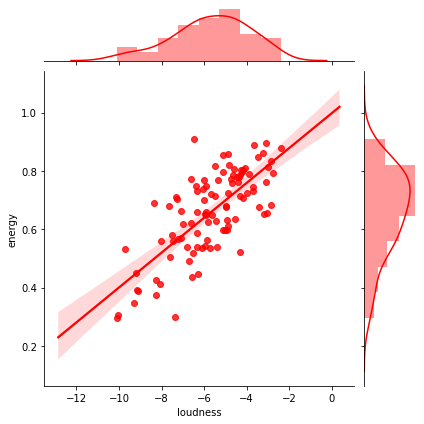

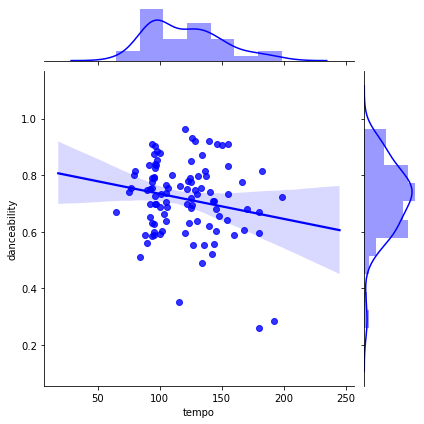

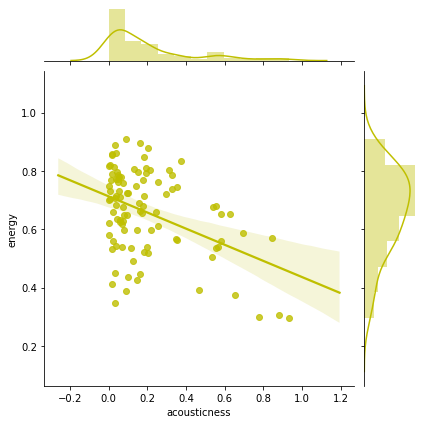

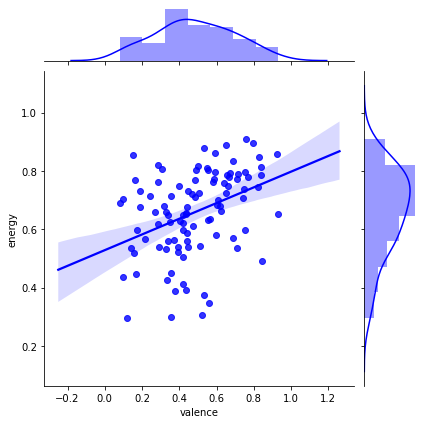

In [48]:

create_joinplot('loudness','energy',df,'r')
create_joinplot('tempo','danceability',df,'b')
create_joinplot('acousticness','energy',df,'y')
create_joinplot('valence','energy',df,'b')

from the corelation matrix we observe that  
- there is a relation between  tempo and dancebility 
- there is a relation between  acounsticeness and energy 
- there is a relation between  tempo and acousticeness
- there is a relation between  energy and loudness
- there is a relation between  tempo and valence
- there is a relation between  valence and dancebility 
- there is a relation between  valence and energy  

### dist plot for feature details 


In [49]:
def feature_details(feature):
    print("Mean value ", feature.mean())
    sns.distplot(feature,color="r")
    plt.show()


Mean value  0.71646


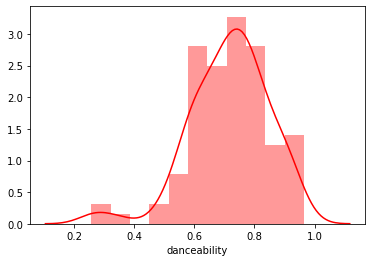

In [50]:
feature_details(df['danceability'])

*Conclusion*: top songs have high dancebility.And people listen to those songs in which they can dance.

Mean value  0.6590600000000001


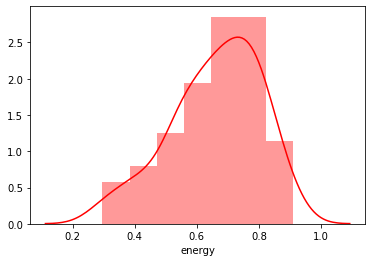

In [51]:
feature_details(df['energy'])

*Conclusion*:people like energetic songs 

Mean value  -5.677639999999999


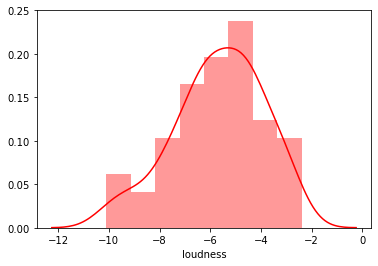

In [52]:
feature_details(df['loudness'])

*Conclusion*: more noice means more ranking 

Mean value  0.19570131999999998


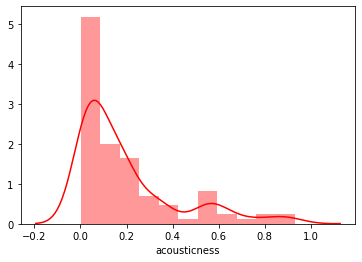

In [53]:
feature_details(df['acousticness'])

*Conclusion*:people don't lisen more to the acoustics 

Mean value  0.4844429999999997


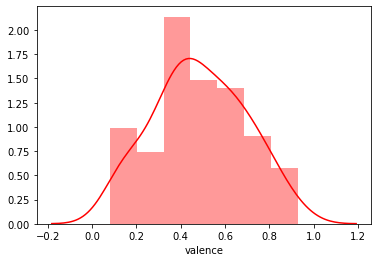

In [54]:
feature_details(df['valence'])

*Conclusion*:songs are evenly distributed and totally depends upon the mood 

Mean value  119.90417999999998


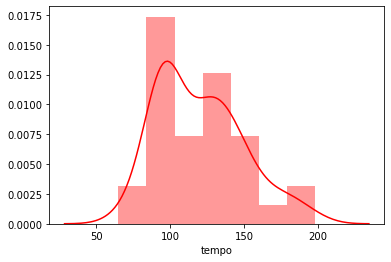

In [55]:
feature_details(df['tempo'])

In [56]:
# store mean values of above features
a=df['danceability'].mean()
b=df['energy'].mean()
c=df['loudness'].mean()
d=df['acousticness'].mean()
e=df['valence'].mean()
f=df['tempo'].mean()

*Conclusion*:people listen fast songs more 

### pca -important features 

In [57]:
def plot_pca_important_features():
    feture_to_plot = ["energy", "liveness", "tempo", "valence","danceability"]
    text1 = df["artists"] + " - " + df["name"]
    text2 = text1.values
    X = df[feture_to_plot].values
    y = df["danceability"].values
    min_maxscaler = MinMaxScaler()
    X = min_maxscaler.fit_transform(X)
    pca = PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    plot3d = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
        text=text2,
        mode="markers",
        marker=dict(
            size=8,
            color=y
        )
    )

    fig = go.Figure(data=[plot3d])
    py.iplot(fig, filename="3d graph-2nd")


In [58]:
plot_pca_important_features()

 # Create a popularity column

In [59]:

#dance ,valence , energy , liveliness

def popularity_binary():
    if  'popularity'  not in df.columns:
         df["popularity"]=""
         df.loc[(df['danceability']>=a) | (df['energy']>=b)| (df['loudness']>=c)| (df['acousticness']>=d)| 
                        (df['valence']>=e)| (df['tempo']>=f),'popularity']='1'
         df.loc[(df['danceability']<a) & (df['energy']<b) & (df['loudness']<c),'popularity']='0'
         df.head()

         df.to_csv(new_dataframe_name,index=False)
           
    else:
        pass
        

In [60]:
popularity_binary()

In [61]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,1,moderate,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,1,slow,1
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,0,fast,0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,1,fast,1
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,1,moderate,1


## correlation between features and popularity

In [62]:
def draw(year,compare_col,color):
    graph = sns.FacetGrid(df_new, col = "popularity")
    graph.map(sns.distplot, compare_col, bins = 25,color=color)
    return plt.show()

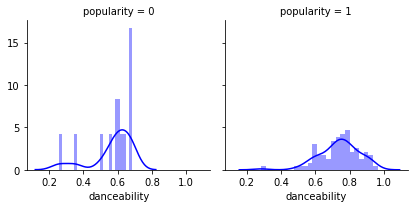

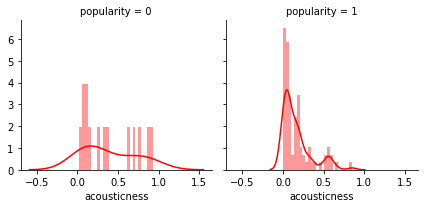

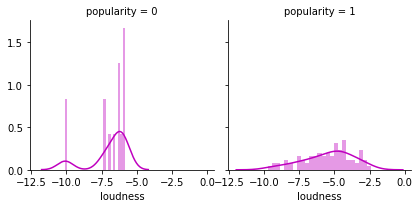

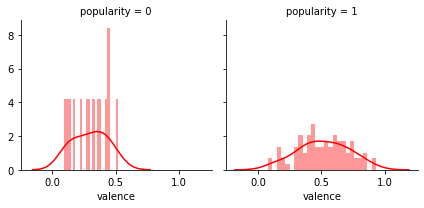

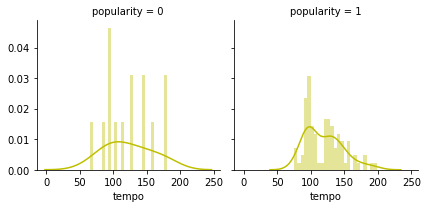

In [63]:
draw(df_new,"danceability","b")
draw(df_new,"acousticness","r")
draw(df_new,"loudness","m")
draw(df_new,"valence","r")
draw(df_new,"tempo","y")


In [64]:
def concat_name_popularity():
    popularity_data = pd.concat([df_new["name"],df_new["popularity"]],axis=1)
    return popularity_data.head()

In [65]:
concat_name_popularity()

,name,popularity
0,God's Plan,1
1,SAD!,1
2,rockstar (feat. 21 Savage),0
3,Psycho (feat. Ty Dolla $ign),1
4,In My Feelings,1


# calculating scores

## data preparation 

In [66]:
df_final=df_new.copy()

In [67]:

def drop():
    
    df_final.drop(["id","name","artists","tempo_rate","dancebility_new"],axis=1,inplace=True)
    return df_final.columns


In [68]:
drop()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

In [69]:
def cateogarize_keys():
    global df_final
    df_final["key"] = df_final["key"].astype("category")
    df_final = pd.get_dummies(df_final, columns=["key"])
    return df_final.head()


In [70]:
cateogarize_keys()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,0.754,0.449,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,...,0,0,0,0,0,1,0,0,0,0
1,0.740,0.613,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,...,0,0,0,0,0,0,1,0,0,0
2,0.587,0.535,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,...,0,0,0,1,0,0,0,0,0,0
3,0.739,0.559,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,...,0,0,0,0,0,0,1,0,0,0
4,0.835,0.626,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,...,0,0,0,0,0,0,0,0,0,0


In [71]:
def cateogarize_time():
    global df_final
    df_final["time_signature"] = df_final["time_signature"].astype("category")
    df_final = pd.get_dummies(df_final, columns=["time_signature"])
    return df_final.head()

In [72]:
cateogarize_time()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,0.754,0.449,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,...,0,0,1,0,0,0,0,0,1,0
1,0.740,0.613,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,...,0,0,0,1,0,0,0,0,1,0
2,0.587,0.535,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,...,1,0,0,0,0,0,0,0,1,0
3,0.739,0.559,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,...,0,0,0,1,0,0,0,0,1,0
4,0.835,0.626,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,...,0,0,0,0,0,0,0,0,1,0


In [73]:
def change_datatype(var):
    df_final[var] = df_final[var].astype(int)
    
columns= ["key_0.0","key_1.0","key_2.0",
         "key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","time_signature_3.0","time_signature_4.0"]
for column in columns:
    change_datatype(column)
    

In [74]:
def load_data():
    
    y = df_final["popularity"].values
    X = df_final.drop(["popularity"],axis=1)
    return X,y
X,y =load_data()

feature_cols = X.columns.to_list()

*NOTE*:There is not a great  linear correlations in our data So, Decision Tree algorithms will give  better results as compared to linear regression models. Therefore using  Random Forest 
 

In [75]:

#x_data=X
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.6)
# X_train = X_train.T
# X_test = X_test.T
X_train=X_train[:None]
X_test=X_test[:None]
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (40, 26)
X_test:  (60, 26)
y_train:  (40,)
y_test:  (60,)


## xgb  top features -for validating  our  hypothesis

In [76]:
def plot_impfeature():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    ax = plot_importance(xgb,color="r", height=0.15,
                         title='  Features Importance ', xlabel='Feature score', ylabel='Features',
                         importance_type='weight'
                        )

    return plt.show()




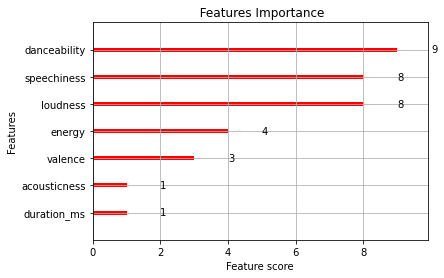

In [77]:
plot_impfeature()

##### The above graph assure that :
-  Our proposed ranked features turned out to be  most important for this data  
-  Example: we calculated features like :dancebility ,energy,loudness ets of most importance.And hence thus turned out true.

In [78]:
def calculate_scores():
    rf=RandomForestClassifier(random_state = 3)
    rf.fit(X_train,y_train)

    print("Train accuracy ",rf.score(X_train,y_train))
    print("Test accuracy ",rf.score(X_test,y_test))

    RandomForestClassifier_score=rf.score(X_test,y_test)
    y_pred=rf.predict(X_test)
    t_true=y_test

In [79]:
calculate_scores()

Train accuracy  1.0
Test accuracy  0.8666666666666667


# validating model 

## plot loudness t-SNE

In [80]:
def plot_pca_scaler(y,dataframe):
    features = ["energy", "liveness", "tempo", "valence", "loudness","danceability"]

    text1 = dataframe["artists"] + " - " + dataframe["name"]
    text2 = text1.values
    
    X = dataframe[features].values
    y = dataframe[y].values

    minmaxscaler = MinMaxScaler()
    X = minmaxscaler.fit_transform(X)

    print('t-SNE starting.................')
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)

    print('......................t-SNE done')

    fig = {
        "data": [
            {
                "x": tsne_results[:, 0],
                "y": tsne_results[:, 1],
                "text": text2,
                "mode": "markers",
                "marker": {"size": 8, "color": y}
            }
        ],
        "layout": {
            "xaxis": {"title": "x-tsne"},
            "yaxis": {"title": "y-tsne"}
        }
    }

    return py.iplot(fig, filename="amit")

In [81]:
plot_pca_scaler("loudness",df)

t-SNE starting.................
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.331982
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.495079
[t-SNE] KL divergence after 300 iterations: 2.274281
......................t-SNE done


## project the 'top' and 'bottom' songs (or 'not-top' songs) 

project into the t-SNE space and see if they cluster differently.

1. separate the songs on the basis of popularity--> o and 1 , here 0  are the not top songs and 1 are top songs

- EXPECTED 1: Songs having popularity 1 should be tightly coupled  and 

- EXPECTED 2: Songs having popularity 0 should be loosely coupled  

In [82]:
def top_songs(dataframe):
    df1 = dataframe[dataframe['popularity'] == 1]
    return plot_pca_scaler("loudness",df1)

In [83]:
top_songs(df_new)

t-SNE starting.................
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.001s...
[t-SNE] Computed neighbors for 86 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 0.367207
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.214767
[t-SNE] KL divergence after 300 iterations: 3.178403
......................t-SNE done


HENCE:assumption 1 prooved 

In [84]:
def not_top_songs(dataframe):
    df2 = dataframe[dataframe['popularity'] ==0 ]
    return plot_pca_scaler("loudness",df2)

In [85]:
not_top_songs(df_new)

t-SNE starting.................
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 14 samples in 0.000s...
[t-SNE] Computed neighbors for 14 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.274590
[t-SNE] KL divergence after 300 iterations: 2.147668
......................t-SNE done


HENCE:assumption 2 also prooved 